<a href="https://colab.research.google.com/github/Shashidhargk/Healthcare-Patient-Clustering/blob/main/heart_disease.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!git clone https://github.com/WasifSohail5/Heart-Disease-Risk-Stratification-and-Patient-Clustering-Analysis.git
%cd Heart-Disease-Risk-Stratification-and-Patient-Clustering-Analysis


Cloning into 'Heart-Disease-Risk-Stratification-and-Patient-Clustering-Analysis'...
remote: Enumerating objects: 36, done.
remote: Counting objects: 100% (36/36), done.
remote: Compressing objects: 100% (32/32), done.
remote: Total 36 (delta 4), reused 29 (delta 3), pack-reused 0 (from 0)
Receiving objects: 100% (36/36), 628.73 KiB | 2.00 MiB/s, done.
Resolving deltas: 100% (4/4), done.
/content/Heart-Disease-Risk-Stratification-and-Patient-Clustering-Analysis


In [ ]:
# 1. Clone the project
!git clone https://github.com/WasifSohail5/Heart-Disease-Risk-Stratification-and-Patient-Clustering-Analysis.git
%cd Heart-Disease-Risk-Stratification-and-Patient-Clustering-Analysis

# 2. Install required libraries
!pip install pandas scikit-learn seaborn matplotlib ucimlrepo

# 3. Download the dataset and save as CSV
from ucimlrepo import fetch_ucirepo
import pandas as pd

heart_disease = fetch_ucirepo(id=45)
X = heart_disease.data.features
y = heart_disease.data.targets

# Combine features and target
df = pd.concat([X, y], axis=1)
df.to_csv("heart_disease_dataset.csv", index=False)

print("✅ Dataset downloaded and saved as heart_disease_dataset.csv")
print("Shape:", df.shape)
print("Columns:", df.columns.tolist())


Cloning into 'Heart-Disease-Risk-Stratification-and-Patient-Clustering-Analysis'...
remote: Enumerating objects: 36, done.
remote: Counting objects: 100% (36/36), done.
remote: Compressing objects: 100% (32/32), done.
remote: Total 36 (delta 4), reused 29 (delta 3), pack-reused 0 (from 0)
Receiving objects: 100% (36/36), 628.73 KiB | 1.90 MiB/s, done.
Resolving deltas: 100% (4/4), done.
/content/Heart-Disease-Risk-Stratification-and-Patient-Clustering-Analysis/Heart-Disease-Risk-Stratification-and-Patient-Clustering-Analysis
✅ Dataset downloaded and saved as heart_disease_dataset.csv
Shape: (303, 14)
Columns: ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'num']


In [ ]:
df = pd.read_csv("heart_disease_dataset.csv")


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
!pip install ucimlrepo


In [ ]:
cluster_df.to_csv("clustered_patients.csv", index=False)


Silhouette Score: 0.33737164016293325
Davies-Bouldin Index: 1.0120218536379355
               age       sex        cp    trestbps        chol       fbs  \
Cluster                                                                    
0        60.551282  0.756410  3.717949  140.512821  267.000000  0.205128   
1        52.105634  0.507042  2.725352  130.950704  249.845070  0.133803   
2        52.686747  0.903614  3.373494  124.662651  222.216867  0.120482   

          restecg     thalach     exang   oldpeak     slope        ca  \
Cluster                                                                 
0        1.358974  129.858974  0.628205  2.180769  2.089744  1.461538   
1        0.887324  162.014085  0.070423  0.366197  1.253521  0.298201   
2        0.819277  146.939759  0.481928  1.119277  1.734940  0.570415   

             thal  
Cluster            
0        6.153846  
1        3.371368  
2        5.731738  


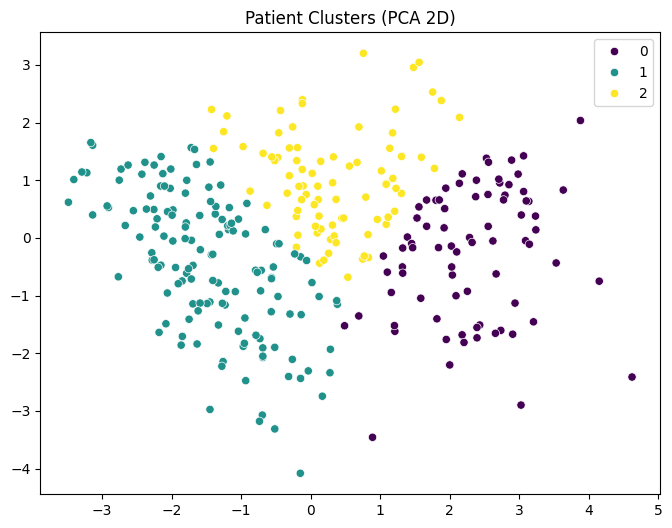

In [ ]:
from ucimlrepo import fetch_ucirepo
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, davies_bouldin_score
import seaborn as sns
import matplotlib.pyplot as plt

# Fetch dataset
heart_disease = fetch_ucirepo(id=45)
X = heart_disease.data.features
y = heart_disease.data.targets

# Handle missing values
X = X.fillna(X.mean())

# Standardize data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# KMeans clustering
kmeans = KMeans(n_clusters=3, random_state=42)
labels = kmeans.fit_predict(X_pca)

# Evaluation
sil_score = silhouette_score(X_pca, labels)
dbi_score = davies_bouldin_score(X_pca, labels)

print("Silhouette Score:", sil_score)
print("Davies-Bouldin Index:", dbi_score)

# Cluster profiling
cluster_df = pd.DataFrame(X, columns=X.columns)
cluster_df['Cluster'] = labels
print(cluster_df.groupby('Cluster').mean())

# Visualization
plt.figure(figsize=(8,6))
sns.scatterplot(x=X_pca[:,0], y=X_pca[:,1], hue=labels, palette='viridis')
plt.title("Patient Clusters (PCA 2D)")
plt.show()


In [ ]:
print(f"Number of samples: {X.shape[0]}")
print(f"Number of features: {X.shape[1]}")
print(f"Target variable: {y.columns[0]}")

Number of samples: 303
Number of features: 13
Target variable: num


Data Exploration and Preprocessing

In [ ]:
X.isnull().sum()

,0
age,0
sex,0
cp,0
trestbps,0
chol,0
fbs,0
restecg,0
thalach,0
exang,0
oldpeak,0


In [ ]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='median')
X_imputed = pd.DataFrame(imputer.fit_transform(X), columns=X.columns)

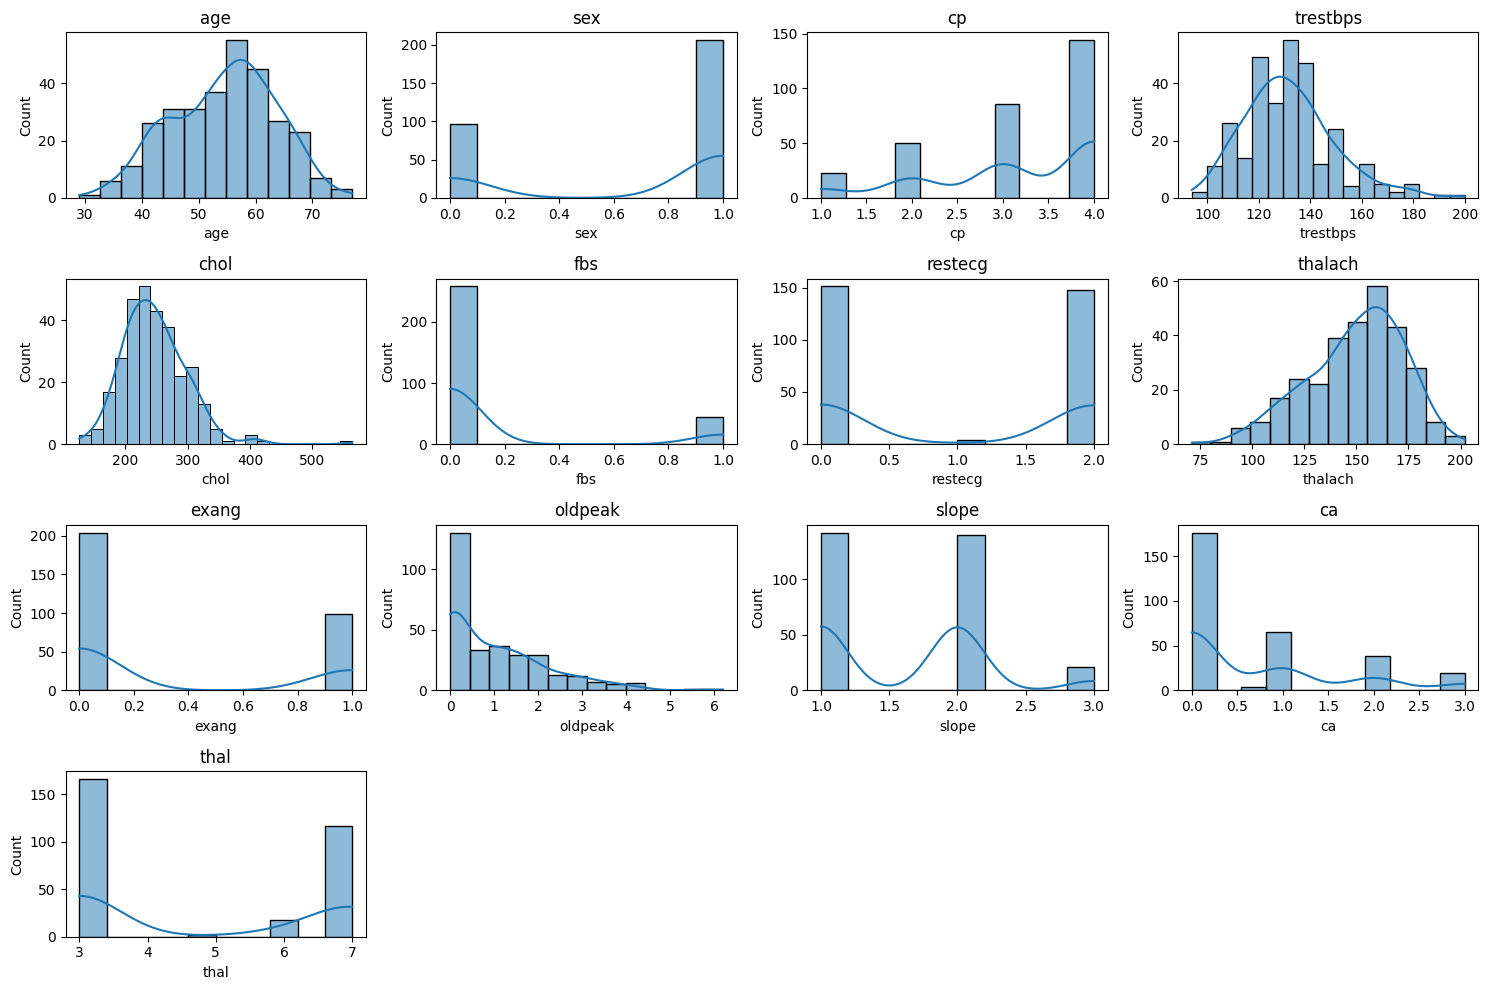

In [ ]:
plt.figure(figsize=(15, 10))
for i, column in enumerate(X_imputed.columns):
    plt.subplot(4, 4, i+1)
    sns.histplot(X_imputed[column], kde=True)
    plt.title(column)
plt.tight_layout()
plt.show()

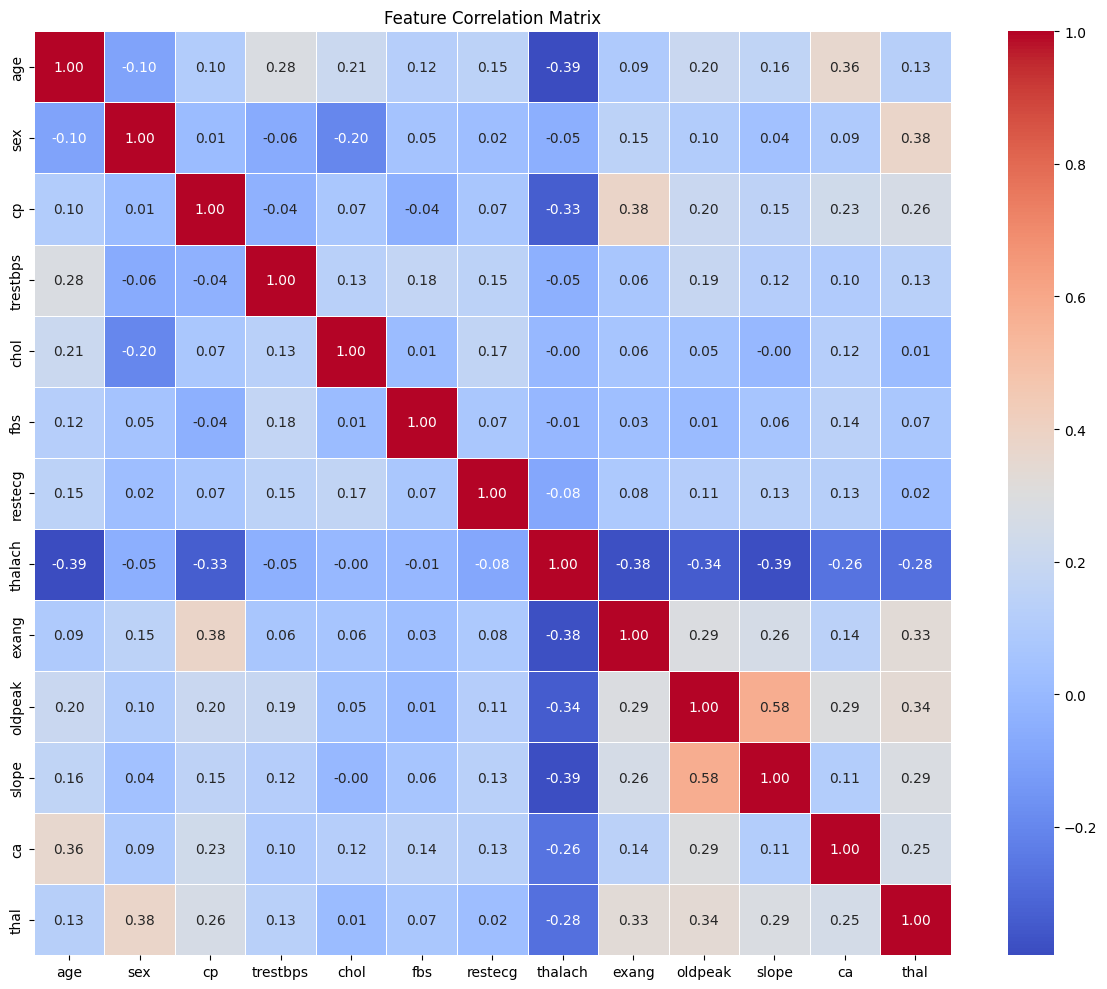

In [ ]:
plt.figure(figsize=(12, 10))
correlation_matrix = X_imputed.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Feature Correlation Matrix')
plt.tight_layout()
plt.show()

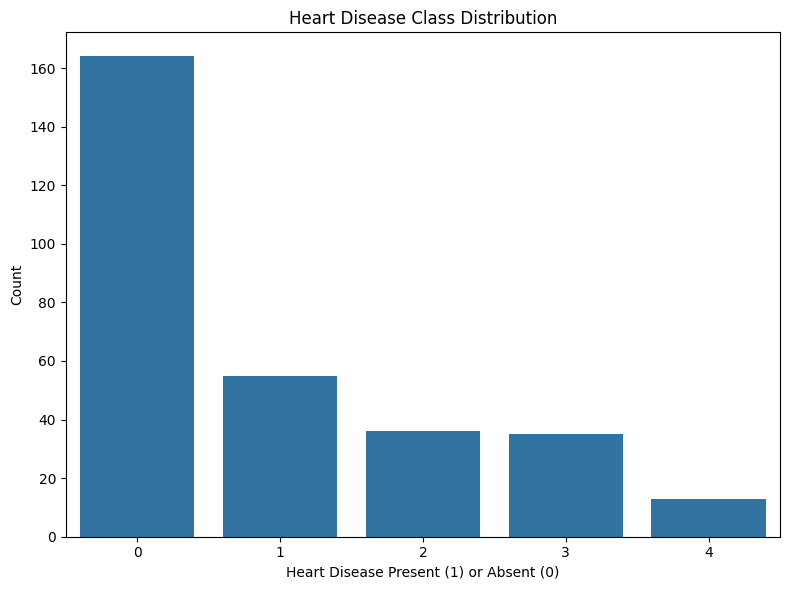

In [ ]:
plt.figure(figsize=(8, 6))
sns.countplot(x=y.values.ravel())
plt.title('Heart Disease Class Distribution')
plt.xlabel('Heart Disease Present (1) or Absent (0)')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = pd.DataFrame(scaler.fit_transform(X_imputed), columns=X_imputed.columns)

In [ ]:
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report


Supervised Learning

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y.values.ravel(), test_size=0.2, random_state=42)

In [ ]:
def evaluate_model(model, name, X_train, X_test, y_train, y_test):
    # Train the model
    model.fit(X_train, y_train)

    # Make predictions
    y_pred = model.predict(X_test)

    # Calculate metrics
    accuracy = accuracy_score(y_test, y_pred)

    # Fix: Add 'average' parameter for multiclass classification
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')

    # Cross-validation score
    cv_scores = cross_val_score(model, X_scaled, y.values.ravel(), cv=5, scoring='accuracy')

    # Report results
    print(f"\n{name} Performance:")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1-Score: {f1:.4f}")
    print(f"Cross-validation accuracy: {np.mean(cv_scores):.4f} (±{np.std(cv_scores):.4f})")

    # Confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
    plt.title(f'Confusion Matrix - {name}')
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.savefig(f'confusion_matrix_{name.lower().replace(" ", "_")}.png')

    return {
        'name': name,
        'model': model,
        'accuracy': accuracy,
        'precision': precision,
        'recall': recall,
        'f1': f1,
        'cv_accuracy': np.mean(cv_scores)
    }

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier
models = [
    {'name': 'Logistic Regression', 'model': LogisticRegression(max_iter=1000, random_state=42)},
    {'name': 'Neural Network', 'model': MLPClassifier(hidden_layer_sizes=(100, 50), max_iter=1000, random_state=42)},
    {'name': 'Random Forest', 'model': RandomForestClassifier(n_estimators=100, random_state=42)},
]

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))



Logistic Regression Performance:
Accuracy: 0.5410
Precision: 0.5120
Recall: 0.5410
F1-Score: 0.5212
Cross-validation accuracy: 0.5942 (±0.0621)

Neural Network Performance:
Accuracy: 0.4918
Precision: 0.4483
Recall: 0.4918
F1-Score: 0.4675
Cross-validation accuracy: 0.5675 (±0.0238)


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))



Random Forest Performance:
Accuracy: 0.4918
Precision: 0.3838
Recall: 0.4918
F1-Score: 0.4283
Cross-validation accuracy: 0.5971 (±0.0471)


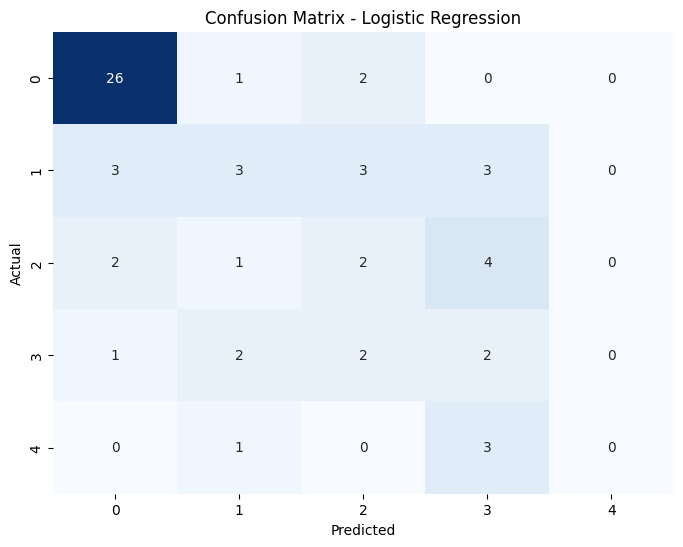

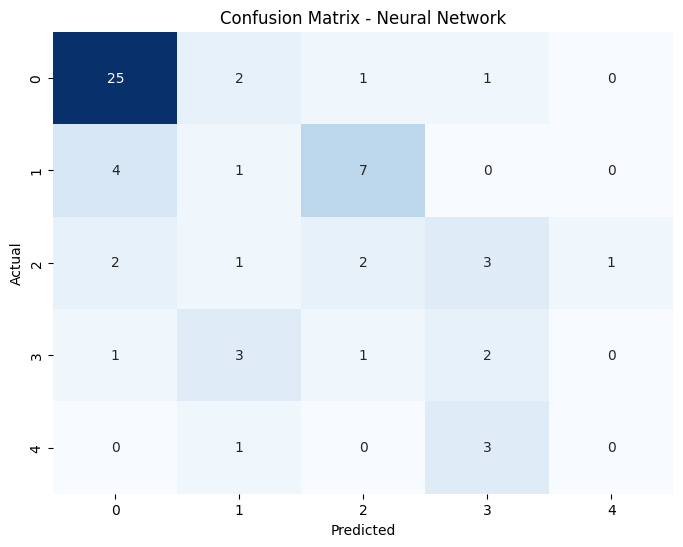

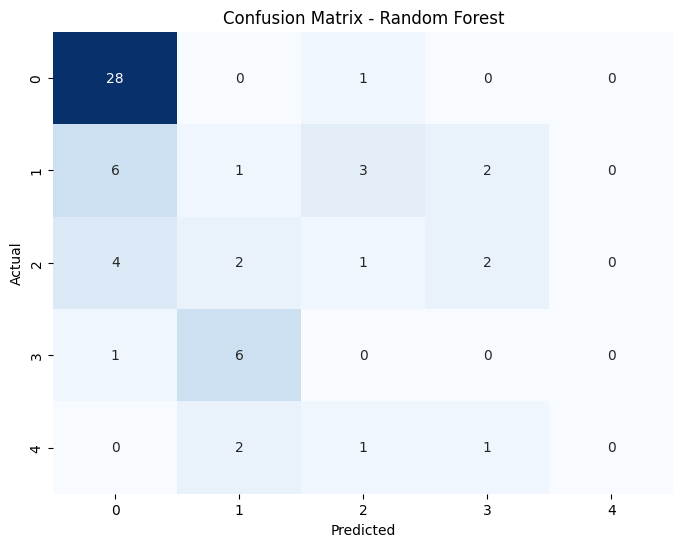

In [ ]:
results = []
for model_info in models:
    result = evaluate_model(model_info['model'], model_info['name'], X_train, X_test, y_train, y_test)
    results.append(result)

# Compare model performance
model_names = [result['name'] for result in results]
accuracies = [result['accuracy'] for result in results]
precisions = [result['precision'] for result in results]
recalls = [result['recall'] for result in results]
f1_scores = [result['f1'] for result in results]

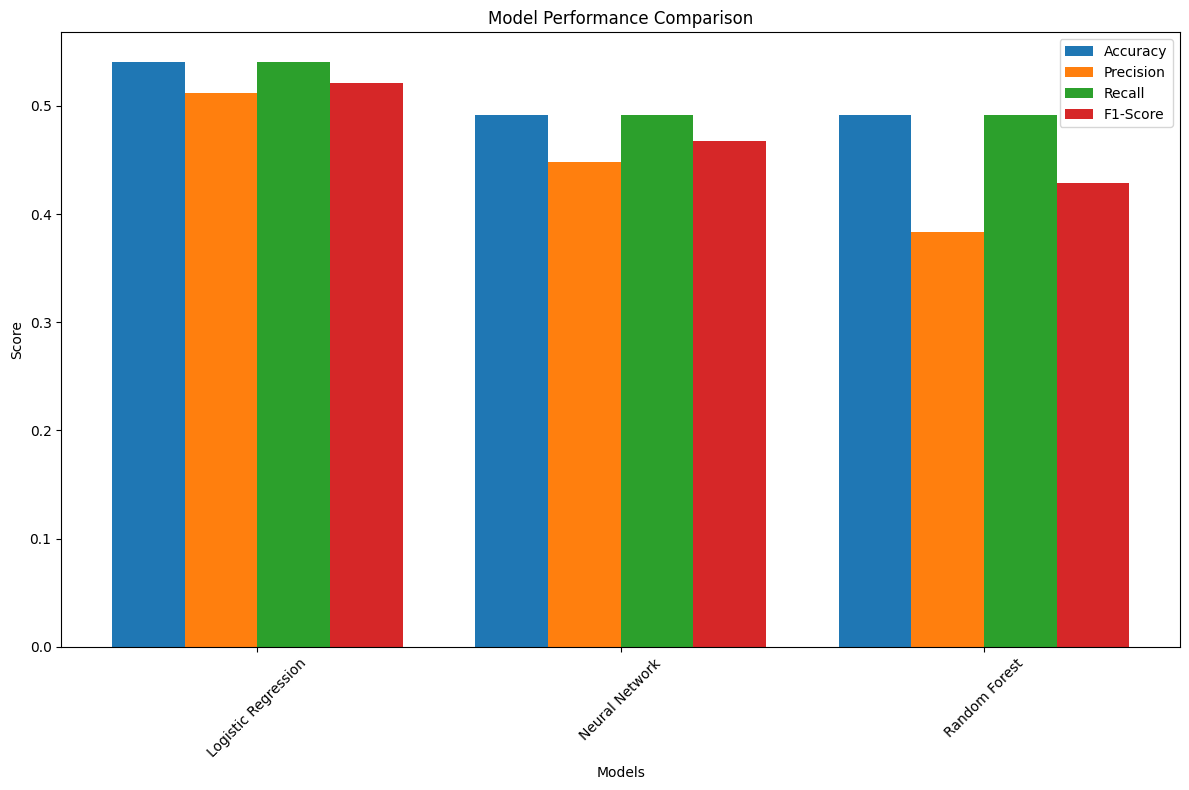

In [ ]:
plt.figure(figsize=(12, 8))
x = np.arange(len(model_names))
width = 0.2

plt.bar(x - width*1.5, accuracies, width, label='Accuracy')
plt.bar(x - width/2, precisions, width, label='Precision')
plt.bar(x + width/2, recalls, width, label='Recall')
plt.bar(x + width*1.5, f1_scores, width, label='F1-Score')

plt.xlabel('Models')
plt.ylabel('Score')
plt.title('Model Performance Comparison')
plt.xticks(x, model_names, rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

In [ ]:
best_model = max(results, key=lambda x: x['f1'])
print(f"Best performing model: {best_model['name']} with F1-Score: {best_model['f1']:.4f}")

Best performing model: Logistic Regression with F1-Score: 0.5212


Unsupervised Learning

In [ ]:
from sklearn.cluster import KMeans
X_for_clustering = X_scaled.copy()

In [ ]:
inertia = []
k_range = range(2, 11)
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_for_clustering)
    inertia.append(kmeans.inertia_)

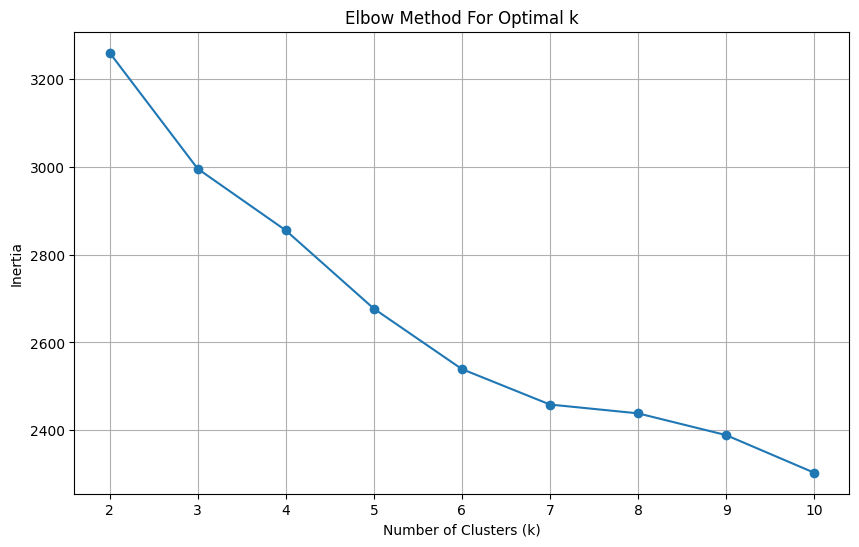

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(k_range, inertia, 'o-')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method For Optimal k')
plt.grid(True)
plt.show()

In [ ]:
optimal_k = 4
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
cluster_labels = kmeans.fit_predict(X_for_clustering)

In [ ]:
X_clustered = X_imputed.copy()
X_clustered['Cluster'] = cluster_labels
X_clustered['Heart_Disease'] = y.values.ravel()

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
principal_components = pca.fit_transform(X_for_clustering)
pca_df = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'])
pca_df['Cluster'] = cluster_labels
pca_df['Heart_Disease'] = y.values.ravel()

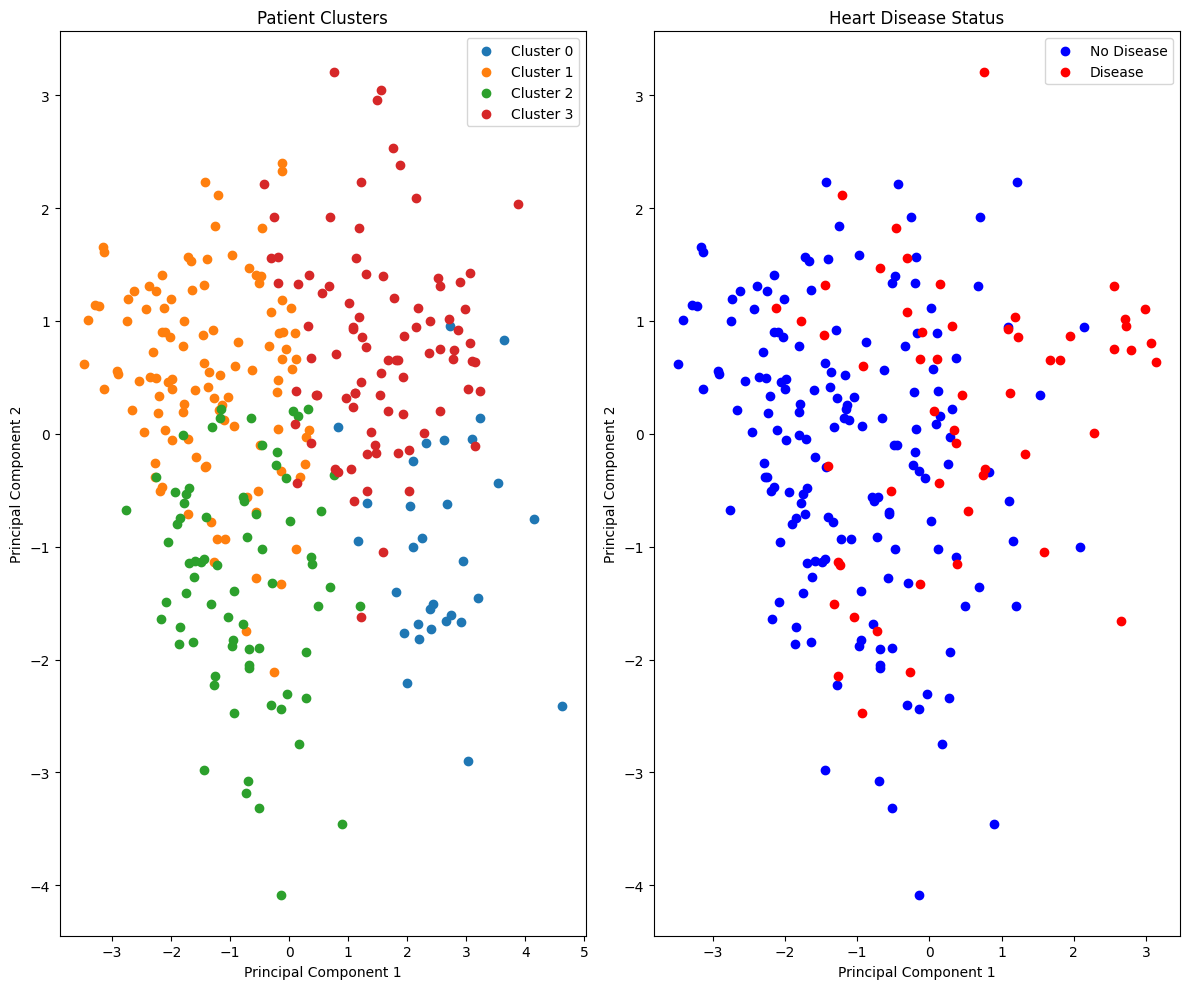

In [ ]:
plt.figure(figsize=(12, 10))

plt.subplot(1, 2, 1)
for i in range(optimal_k):
    plt.scatter(pca_df[pca_df['Cluster'] == i]['PC1'],
                pca_df[pca_df['Cluster'] == i]['PC2'],
                label=f'Cluster {i}')
plt.title('Patient Clusters')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()

# Plot clusters colored by heart disease status
plt.subplot(1, 2, 2)
colors = {0:'blue', 1:'red'}
for disease_status, color in colors.items():
    mask = pca_df['Heart_Disease'] == disease_status
    plt.scatter(pca_df.loc[mask, 'PC1'],
                pca_df.loc[mask, 'PC2'],
                c=color,
                label=f'{"Disease" if disease_status == 1 else "No Disease"}')
plt.title('Heart Disease Status')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.tight_layout()
plt.show()

In [ ]:
X_clustered.groupby('Cluster').mean()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,Heart_Disease
Cluster,,,,,,,,,,,,,,
0,60.612903,0.612903,3.709677,150.935484,273.258065,0.387097,1.677419,138.032258,0.419355,2.700000,2.193548,1.870968,6.193548,2.451613
1,48.279279,0.891892,2.657658,128.477477,228.117117,0.126126,0.720721,165.576577,0.054054,0.571171,1.369369,0.297448,4.198198,0.360360
2,58.260274,0.068493,2.972603,132.945205,269.424658,0.109589,1.054795,150.931507,0.164384,0.538356,1.438356,0.369863,3.133345,0.164384
3,56.863636,0.943182,3.750000,127.920455,241.909091,0.125000,1.034091,132.443182,0.772727,1.461364,1.818182,0.973548,6.224252,1.772727


In [ ]:
cluster_disease=X_clustered.groupby('Cluster')['Heart_Disease'].mean()
cluster_disease

,Heart_Disease
Cluster,
0,2.451613
1,0.360360
2,0.164384
3,1.772727


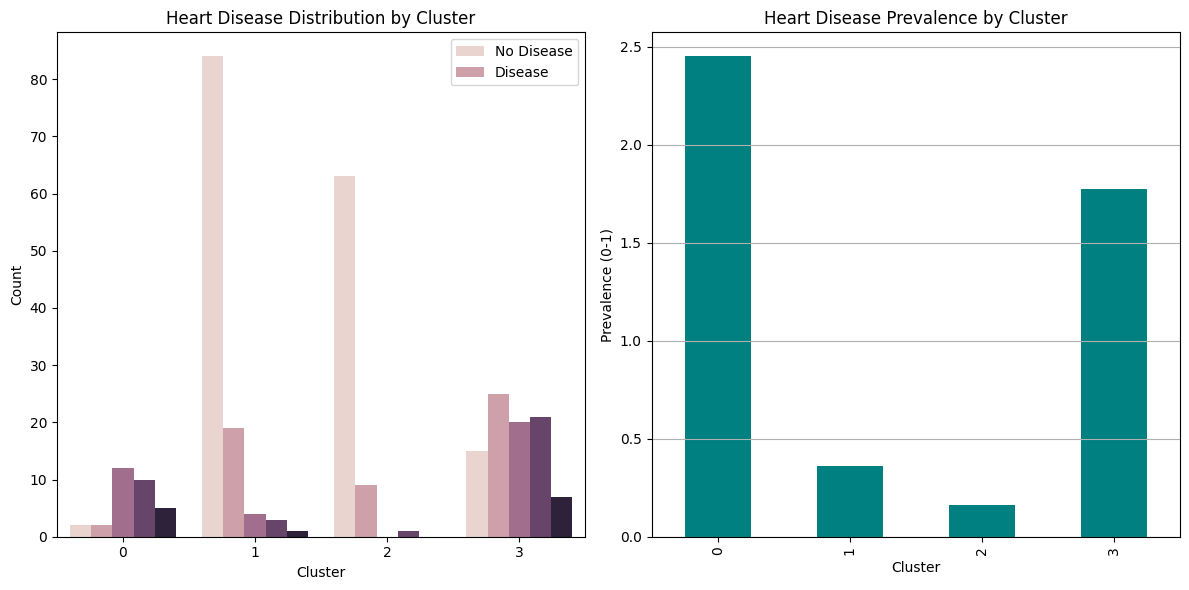

In [ ]:
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.countplot(x='Cluster', hue='Heart_Disease', data=X_clustered)
plt.title('Heart Disease Distribution by Cluster')
plt.xlabel('Cluster')
plt.ylabel('Count')
plt.legend(['No Disease', 'Disease'])

plt.subplot(1, 2, 2)
cluster_disease.plot(kind='bar', color='teal')
plt.title('Heart Disease Prevalence by Cluster')
plt.xlabel('Cluster')
plt.ylabel('Prevalence (0-1)')
plt.grid(axis='y')

plt.tight_layout()